# Python Project - (Prosper Loan Data)
## by (Emmanuel Makun)

## Introduction
This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. The dataset contains information on 113,937 loans and 81 variables, including borrower rate, loan amount, current loan status, borrower income, employment status, credit history, and payment information. Predicting the status of a loan is an important problem in risk assessment. A bank or financial organisation has to be able to estimate the risk involved before granting a loan to a customer.

## Preliminary Wrangling

In [2]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset into jupyter notebook


In [5]:
df = pd.read_csv('Prosper_loan.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [7]:
df.shape

(113937, 81)

In [8]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

The structure of my dataset is a tabular data structure that consists of 113937 rows and 81 columns. 

### What is/are the main feature(s) of interest in your dataset?

- Employment status
- Credit grade
- Borrower rate
- Loan Original amount
- Income range

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Employment status
- Borrower status
- Income range
- Credit grade

## Univariate Exploration

In [ ]:
# What is the Credit Grade and how does it affect the whole distribution ? 

In [13]:
df.CreditGrade.value_counts().index

Index(['C', 'D', 'B', 'AA', 'HR', 'A', 'E', 'NC'], dtype='object')

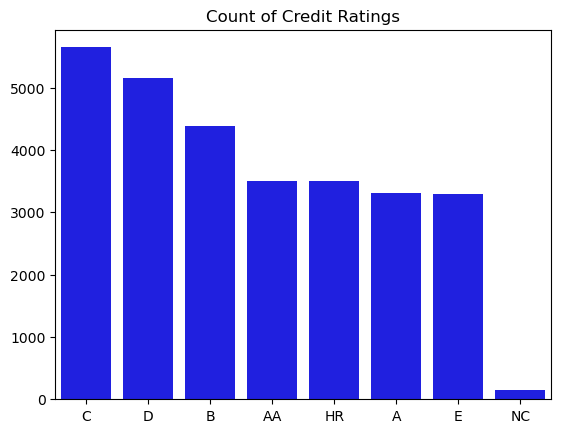

In [32]:
#Create a bar plot to show credit Grade
sns.countplot(data=df, x='CreditGrade',order=df.CreditGrade.value_counts().index,color='blue');

#Add titles and labels to chart
plt.title('Count of Credit Ratings');
plt.xlabel('');
plt.ylabel('');

### Observation

Prosper loans are assigned a rating from AA(lowest risk, lowerst return) to HR(highest risk, highest return).From the above plot, most obseravtions are within the C credit ratings, which signify a lower risk of default.

In [ ]:
#Convert borrowed rate to percentage and plot a histogram of the data

In [6]:
df['borrowed_rate']= df['BorrowerRate'] * 100

In [7]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,borrowed_rate
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,15.80
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,9.20
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,27.50
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,9.74
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,20.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,18.64
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,11.10
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,21.50
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,26.05


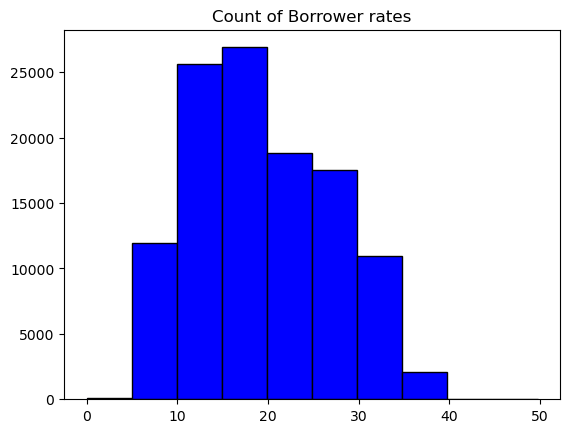

In [31]:
plt.hist(data=df, x='borrowed_rate', bins=10, color='blue', edgecolor='black');

#Add titles and labels to chart
plt.title('Count of Borrower rates');
plt.xlabel('');
plt.ylabel('');


The distributions shows interest rates within 1% - 39% as a rough estimate. Most interest rates falling within 15%-18% mark. This may show where current interest rates levels are at the moment.     

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I changed the borrower rate column to percentage to correctly plot the interest rates and identify interest rate levels. 

## Bivariate Exploration



In [ ]:
# What is the relationship between employment status and loan original amount?


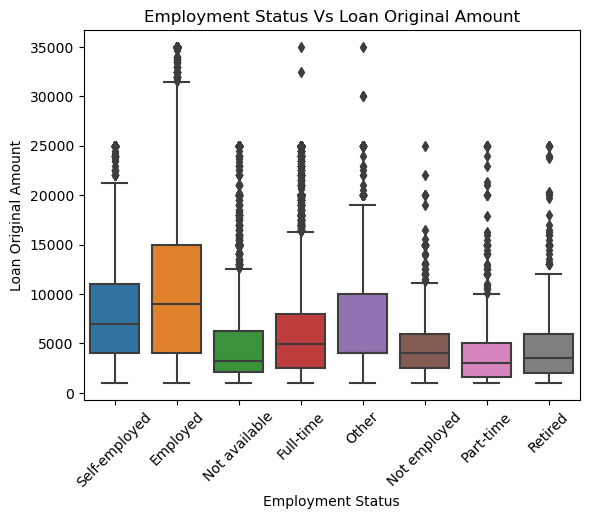

In [37]:
el = sns.boxplot(data=df, x='EmploymentStatus',y='LoanOriginalAmount');
el.set_xticklabels(el.get_xticklabels(),rotation=45);

#Add titles and labels to chart
plt.title('Employment Status Vs Loan Original Amount');
plt.xlabel('Employment Status');
plt.ylabel('Loan Original Amount');

### Observation

From the plot, we observe that most of the loans approved fall in the median category of the population of those who are employed and this is followed by those who are self-employed. Also, we observe many oyutliers for this particular distribution

In [ ]:
# What is the relationship between the Loan amount and the monthly loan payment ?

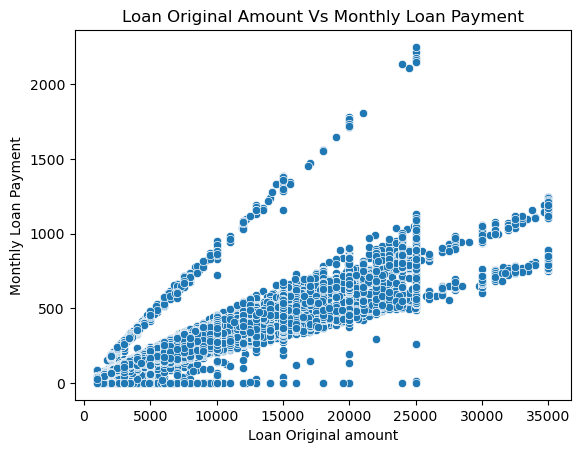

In [40]:
sns.scatterplot(x='LoanOriginalAmount', y='MonthlyLoanPayment', data=df);
#Add titles and labels to chart
plt.title('Loan Original Amount Vs Monthly Loan Payment');
plt.xlabel('Loan Original amount');
plt.ylabel('Monthly Loan Payment');

### Observation

There is a positive relationship between the Loan orginal amount given and the monthly loan payment. This shows as the amount of the loan increases the monthly loan payment also increases. There are also some few outliers which maybe due to the longer term loans.

In [ ]:
# What is the relationship between the employement status and loan status ?

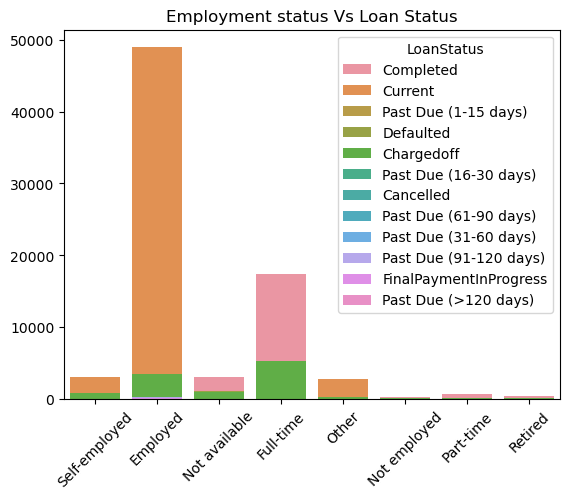

In [13]:
el = sns.countplot(data=df, x='EmploymentStatus', hue='LoanStatus', dodge=False);
el.set_xticklabels(el.get_xticklabels(),rotation=45);

#Add titles and labels to chart
plt.title('Employment status Vs Loan Status');
plt.xlabel('');
plt.ylabel('');

### Observation

The plot shows most of the population that is employed and are full time have their loan status current and completed respectively.

## Conclusion

I have performed exploratory data analysis on prosper loan data in sevaral steps including: cleaning the data, exploring the content and various features and assessing the relationships between the different variables. The different charts used in this visulaization included the bar chart, histogram, box plot, stacked bar and scatter plot. Valuable insights have been gotten and recommendations given to guide Prosper loan with loan management and risk assessment. 